In [1]:
from tensorflow.keras.layers import  Input, Lambda, Dense , Flatten,  Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
IMAGE_SIZE = [224,224]
data = 'Dataset/' 

In [4]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top = False)

In [5]:
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
folders = glob('Dataset/*')

In [7]:
folders


['Dataset\\Parasitized', 'Dataset\\Uninfected']

In [8]:
x = Flatten()(vgg19.output)
prediction = Dense(len(folders),activation='softmax')(x)


In [9]:
model = Model(inputs=vgg19.input,outputs = prediction)

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data



validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = train_datagen.flow_from_directory(
    data, # same directory as training data
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [13]:
r = model.fit(train_generator,
              validation_data=validation_generator,
              epochs=10,
             steps_per_epoch=len(train_generator),
             validation_steps=len(validation_generator))

Epoch 1/10
689/689 [==============================] - 1009s 1s/step - loss: 0.3743 - accuracy: 0.8362 - val_loss: 0.2845 - val_accuracy: 0.8846
Epoch 2/10
689/689 [==============================] - 814s 1s/step - loss: 0.2799 - accuracy: 0.8907 - val_loss: 0.2839 - val_accuracy: 0.8976
Epoch 3/10
689/689 [==============================] - 954s 1s/step - loss: 0.2676 - accuracy: 0.8987 - val_loss: 0.3955 - val_accuracy: 0.8419
Epoch 4/10
689/689 [==============================] - 1480s 2s/step - loss: 0.2448 - accuracy: 0.9075 - val_loss: 0.3069 - val_accuracy: 0.8882
Epoch 5/10
689/689 [==============================] - 12912s 19s/step - loss: 0.2481 - accuracy: 0.9082 - val_loss: 0.2742 - val_accuracy: 0.8958
Epoch 6/10
689/689 [==============================] - 721s 1s/step - loss: 0.2480 - accuracy: 0.9092 - val_loss: 0.2696 - val_accuracy: 0.8991
Epoch 7/10
689/689 [==============================] - 803s 1s/step - loss: 0.2470 - accuracy: 0.9138 - val_loss: 0.2781 - val_accuracy: 0

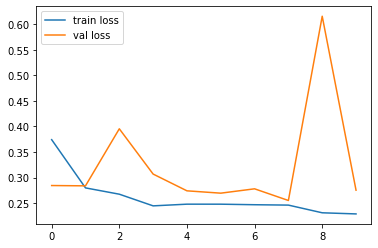

In [14]:
#Plot Loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()


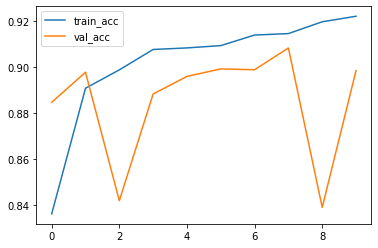

In [15]:
#plotting acc
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [16]:
model.save('model_vgg19.h5')

In [17]:
#Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('model_vgg19.h5')

In [18]:
img = image.load_img(r'C:\Users\Kushagra\Desktop\Projects\Malaria detection\Dataset\Test\Uninfected\2.png',target_size=(224,224))

In [19]:
img = image.img_to_array(img)

In [20]:
img = img/255.0

In [21]:
img.shape

(224, 224, 3)

In [22]:
img = np.expand_dims(img,axis=0)
img_data = preprocess_input(img)
img_data.shape

(1, 224, 224, 3)

In [23]:
model.predict(img_data)

array([[2.7158868e-38, 1.0000000e+00]], dtype=float32)

In [24]:
ans = np.argmax(model.predict(img_data),axis=1)
if ans ==1:
    print("uninfected")
else:
    print("infected")
    

uninfected
